# Insurance Claim Prediction

# Problem Statement:-

A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs.

# Data Definition

age : Age of the policyholder

sex: Gender of policyholder

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight

children: Number of children of the policyholder

smoker: Indicates policy holder is a smoker or a non-smoker (non-smoker=0;smoker=1)

region: The region where the policy holder belongs to (northeast, northwest, southeast, southwest)

claim: Claim amount

bloodpressure: Bloodpressure reading of policyholder

diabetes: Suffers from diabetes or not (non-diabetic=0; diabetic=1)

regular_ex: Regularly excercise or not (no-excercise=0; excercise=1)

# Table of Content

Import Libraries

Setting options

Read Data

Understanding the Dataset and Data Types

Summary Statistics

Checking Missing Values

Correlation and checking collinearity

Discover Outliers with Visualization

Check for Normality

Shapiro Wilk Test to confirm the normal distribution of the data

Log Transform to reduce skewness of the target variable

Dummy Encoding of Categorical Variables

Linear Regression models with (i) Original target variable 
                              (ii) log transformed target variable

Result

Conclusion

In [226]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings

In [227]:
# Settings options
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all datatframe rows
pd.options.display.max_rows = None

# to set the limit to 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

In [228]:
# Load the dataset

df = pd.read_csv("C:/Users/punam/Downloads/healthinsurance.csv")

# Understanding the Dataset

In [229]:
# View first few rows of the dataset
df.head(4)

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,54,female,47.400,0,0,southeast,90,1,0,63770.430
1,45,male,57.000,0,0,southeast,66,1,0,62592.870
2,52,male,34.500,3,0,northwest,70,0,0,60021.400
3,31,female,38.100,1,0,northeast,80,1,0,58571.070


In [230]:
# Check the shape of the data
df.shape

(1338, 10)

The dataset contains 1338 rows(observations) and 10 columns.

In [231]:
# Check the datatypes
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker             int64
region            object
bloodpressure      int64
diabetes           int64
regular_ex         int64
claim            float64
dtype: object

From the above output, we see that the data type of "smoker", "diabetes" and "regular_ex" is int64.

But in reality, "smoker", "diabetes" and "regular_ex" are categorical variables, which are wrongly interpreted as int64, so we will convert these variables data type to object.

In [232]:
# Convert numeric variables to categorical datatype wherever needed
df.smoker = df.smoker.astype('object')
df.diabetes = df.diabetes.astype('object')
df.regular_ex = df.regular_ex.astype('object')

In [233]:
# Let us recheck the datatype conversion
df.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
bloodpressure      int64
diabetes          object
regular_ex        object
claim            float64
dtype: object

In [234]:
# Statistical summary of the numerical data
df.describe()

,age,bmi,children,bloodpressure,claim
count,1338.000,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.808,1.095,68.978,13270.422
std,14.050,6.282,1.205,19.328,12110.011
min,18.000,16.000,0.000,0.000,1121.870
25%,27.000,26.300,0.000,64.000,4740.288
50%,39.000,30.500,1.000,72.000,9382.030
75%,51.000,34.800,2.000,80.000,16639.915
max,64.000,62.000,5.000,122.000,63770.430


The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation. 

If we observe, the average age of a person in the dataset is 39 years. The claim cost is between 1121 to 63770. Here the mean body mass index of a person is 30 (The healthy bmi range is between 25 to 30)

In [235]:
# Summary of categorical data
df.describe(include = 'object' )

,sex,smoker,region,diabetes,regular_ex
count,1338,1338,1338,1338,1338
unique,2,2,4,2,2
top,male,0,southeast,1,0
freq,676,1145,364,920,911


Here we observe the unique values for all categorical data. The data has been taken from four different regions and most of the data are from southeast region. There are more number of non smokers in the dataset and most of the people are diabetic.

# Missing Values

In [236]:
# Check for missing values
df.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
bloodpressure    0
diabetes         0
regular_ex       0
claim            0
dtype: int64

There are no null values/missing data.

# Correlation

Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations.

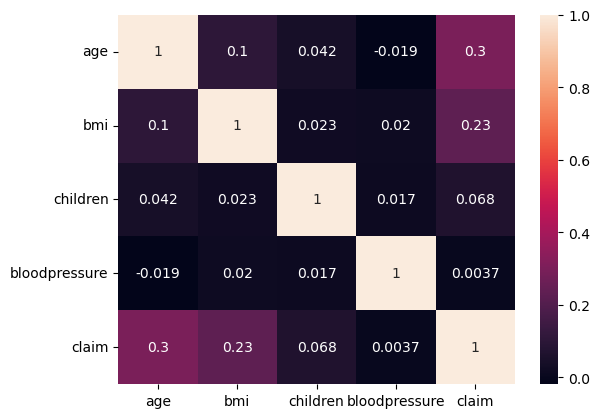

In [237]:
# We can draw a heatmap with annotations, using seaborn library to check correlations between different columns
sns.heatmap(df.corr(), annot = True)
plt.show()

It is seen that the continuous variables are not correlated with each other since all the correlation coefficients are close to zero. Which also indicates that there is no multicollinearity in the data.

For Linear Regression, one of the important assumption is that there should be no multicollinearity in the data.

In [238]:
# Alternatively, filter the numerical features in the dataset to find the correlation
df_numeric_feat = df.select_dtypes(include = [np.number])

# print the names of the numeric variables that are part of the df_numeric_feat dataframe
df_numeric_feat.columns

Index(['age', 'bmi', 'children', 'bloodpressure', 'claim'], dtype='object')

The dataframe df_numeric_feat has 5 numeric columns.

In [239]:
# Generate a correlation matrix
df_numeric_feat.corr()

,age,bmi,children,bloodpressure,claim
age,1.000,0.104,0.042,-0.019,0.299
bmi,0.104,1.000,0.023,0.020,0.229
children,0.042,0.023,1.000,0.017,0.068
bloodpressure,-0.019,0.020,0.017,1.000,0.004
claim,0.299,0.229,0.068,0.004,1.000


# Discover Outliers with Visualization

One of the assumption of Linear Regression is there should be no outliers.

<Axes: >

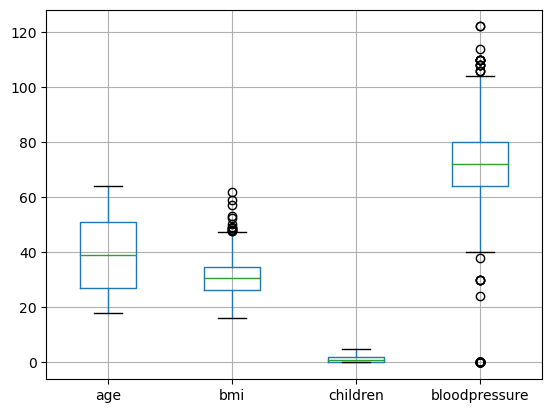

In [240]:
# Let us create a boxplot for all numeric features
df_numeric_feat.boxplot(column=['age','bmi','children','bloodpressure'])

From the above plot, we notice that for the variable bmi there are points above the upper extreme - these points are outliers. Also for the variable bloodpressure, we see there are outliers at both the extremes.
Let us use the IQR method to remove the outliers.

We shall calculate the IQR and remove the outliers based on IQR method

In [241]:
# Drop the target variable from the numeric feature dataframe before IQR calculation because we don't intend to delete the high values from the target feature
df_numeric_feat = df_numeric_feat.drop(['claim'], axis=1)

# Calculate interquartile range
Q1 = df_numeric_feat.quantile(0.25)
Q3 = df_numeric_feat.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age             24.000
bmi              8.500
children         2.000
bloodpressure   16.000
dtype: float64


In [242]:
# Removing outliers from the dataframe
df_final = df[~((df<Q1-1.5*IQR)|(df>Q3+1.5*IQR)).any(axis=1)]

In [243]:
#Let us check the shape for verification
df_final.shape

(1242, 10)

So, above output shows there is reduction in the number of rows. Now, to confirm that the outliers have been removed let us visualize the boxplot again.

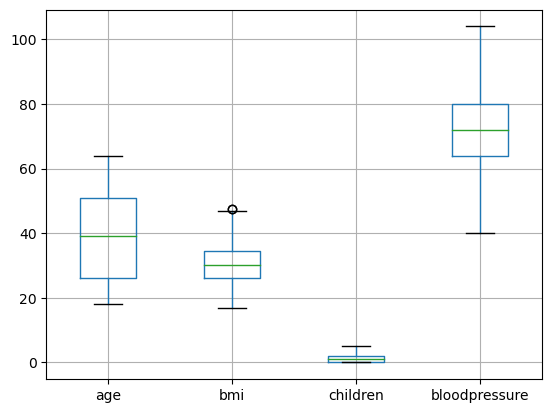

In [244]:
# Rechecking for outliers through visualization
df_final.boxplot(column=['age','bmi','children','bloodpressure'])
plt.show()

# Check for Normality of data:

It is not a strict assumption of linear regression for the data to be normally distributed. However, if the data is normally distributed then linear regression tends to perform better

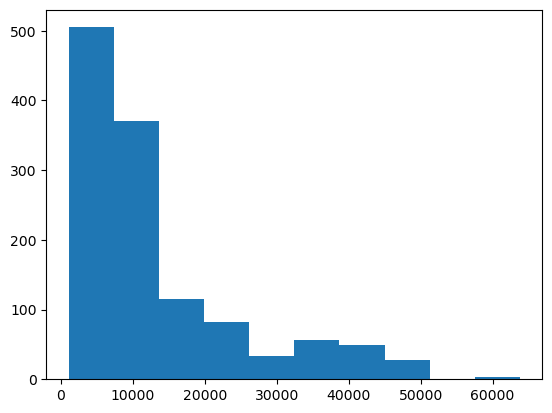

In [245]:
# To view the distribution of our target variable let us use a histogram.
plt.hist(df_final.claim)
plt.show()

From the above plot, we can notice that the variable 'claim' is heavily right skewed and not normally distributed.

We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insight.

Thus for further statistical confirmation we perform the Shapiro-Wilk test. Shapiro Wilk test is a statistical test for normality.

# Shapiro Wilk Test

The null and alternate hypothesis of Shapiro Wilk test are as follows:

Ho: The data is normally distributed

Ha: The data is not normally distributed

In [246]:
# import shapiro from scipy
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df_final.claim)

# To print the numeric outputs of the shapiro test upto 3 decimal places
print('Statistics = %.3f, p-value = %.3f' %(stat, p))

# display the conclusion
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics = 0.817, p-value = 0.000
Sample does not look Gaussian (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.

Shaprio Wilk Test does not work if the number of observations are more than 5000. However Shapiro Wilk test is more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used.

Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable.

# Log Transform

The log transformation can be used to make highly skewed distributions less skewed.

We use np.log() to log transform the claim variable. We also store the transformed variable into our data frame with a new name, log_claim.

In [247]:
# log transformation for normality
df_final['log_claim'] = np.log(df_final['claim'])

# display first few rows of the dataset
df_final.head(4)

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim,log_claim
0,54,female,47.400,0,0,southeast,90,1,0,63770.430,11.063
2,52,male,34.500,3,0,northwest,70,0,0,60021.400,11.002
3,31,female,38.100,1,0,northeast,80,1,0,58571.070,10.978
5,60,male,32.800,0,1,southwest,75,0,0,52590.830,10.870


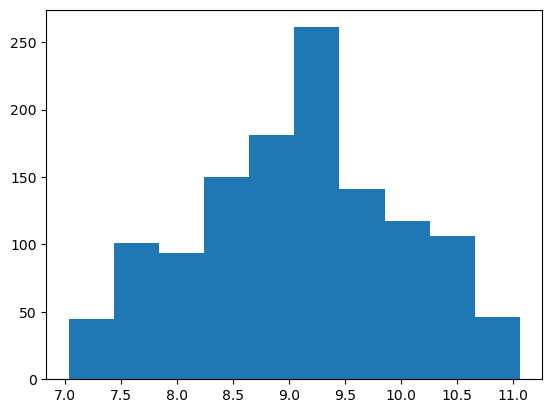

In [248]:
# Recheck for normality
# Display histogram of the data
plt.hist(df_final.log_claim)

plt.show()

It can be seen that the variable claim is nearly normally distributed. 

However we again confirm by Shapiro Wilk test.

Lets recollect that the null and alternate hypothesis of Shapiro Wilk test are as follows:
    
Ho: The data is normally distributed

Ha: The data is not normally distributed

In [249]:
# rechecking normality by Shapiro Wilk test
statn, pv = shapiro(df_final.log_claim)
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))

# interpret
alpha = 0.05
if pv > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.983, p-value=0.000
Sample does not look Gaussian (reject H0)


It can be visually seen that the data has near-normal distribution, but Shapiro Wilk test does not support the claim.

Let us now proceed to train models. One model with the original claim variable and another model with the log transformed claim variable. We shall begin by fitting a linear regression mode using the method of ordinary least squares.

However, we need to perform dummy encoding on our categorical variables before we proceed since the method of OLS works only on numeric data. Dummy coding refers to the process of coding a categorical variable into dichotomous variables.

# Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As discussed earlier, it can be seen that some varibles are categorical. The OLS method fails in presence of categorical variables. To overcome this we use dummy coding.

In [250]:
# Filter the numeric features from the dataset
df_num_feat = df_final.select_dtypes(include=[np.number])

# display the numeric features
df_num_feat.columns

Index(['age', 'bmi', 'children', 'bloodpressure', 'claim', 'log_claim'], dtype='object')

In [251]:
# Filter the categorical features from the dataset
df_cat_feat = df_final.select_dtypes(include=[object])

# display the categorical features
df_cat_feat.columns

Index(['sex', 'smoker', 'region', 'diabetes', 'regular_ex'], dtype='object')

In [252]:
# create a dataframe with only encoded categorical features
for col in df_cat_feat.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_cat_feat[col], prefix= col, drop_first = True)
    # add dummy_encoded_variables to df_cat_feat before deleting the original uncoded features
    df_cat_feat = pd.concat([df_cat_feat, dummy_encoded_variables], axis=1)
    # Now drop the original categorical columns
    df_cat_feat.drop([col], axis = 1, inplace = True)

In [253]:
# Concatenate the numerical and dummy encoded categorical variables
df_dummy = pd.concat([df_num_feat, df_cat_feat], axis = 1)

In [254]:
# Check the dataframe with dummy variables
df_dummy.head()

,age,bmi,children,bloodpressure,claim,log_claim,sex_male,smoker_1,region_northwest,region_southeast,region_southwest,diabetes_1,regular_ex_1
0,54,47.400,0,90,63770.430,11.063,0,0,0,1,0,1,0
2,52,34.500,3,70,60021.400,11.002,1,0,1,0,0,0,0
3,31,38.100,1,80,58571.070,10.978,0,0,0,0,0,1,0
5,60,32.800,0,75,52590.830,10.870,1,1,0,0,1,0,0
6,28,36.400,1,78,51194.560,10.843,1,0,0,0,1,1,0


Thus we have obtained the dummy coded variables.

Note how the categorical variables are dummy encoded creating n-1 variables for each categorical variables where n is the number of classes in each categorical variable. So for variable region, which has 4 levels, it has created 3 dummy encoded variables. Similarly, variable smoker has 2 levels and it has created 1 dummy encoded variable.

# Linear Regression with Original (Right Skewed) Target variable

In [255]:
# Split the dataset into independent and target variables
X = df_dummy.drop(['claim','log_claim'], axis = 1)
Y = df_dummy['claim']

In [256]:
# Divide the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [257]:
# Instantiate a Linear regression model

lr = LinearRegression()

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [258]:
# print the coefficients output
pd.DataFrame({'attribute/features': X_train.columns, 'coeff.':lr.coef_})

,attribute/features,coeff.
0,age,275.254
1,bmi,370.352
2,children,564.398
3,bloodpressure,40.795
4,sex_male,468.320
5,smoker_1,20138.208
6,region_northwest,-406.254
7,region_southeast,-1431.230
8,region_southwest,-1569.044
9,diabetes_1,2678.023


In [259]:
# Let us find out the R2 score and the Adjusted R2 score (because this is a case of multivariate data) to determine the goodness of fit of our model.
r_2_test = lr.score(X_test, Y_test)
print('R_sq_test with original dependent variable =', r_2_test)

# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_r2_test = 1-(1-r_2_test)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Adj_R_sq_test with original dependent variable =', adj_r2_test)

r_2_train = lr.score(X_train, Y_train)
adj_r2_train = 1-(1-r_2_train)*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)
print('\n''R_sq_train with original dependent variable =', r_2_train)
print('Adj_R_sq_train with original dependent variable =', adj_r2_train)

R_sq_test with original dependent variable = 0.496815654722099
Adj_R_sq_test with original dependent variable = 0.48148316774687205

R_sq_train with original dependent variable = 0.49009415971080594
Adj_R_sq_train with original dependent variable = 0.48354927728002284


With an R_squared value that low, our predictions are nowhere close to reliable.

Let us use a scatter plot between the observed and the predicted values to make a better judgment

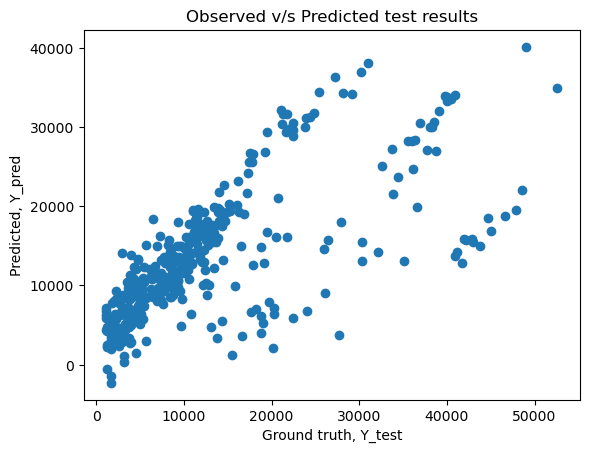

In [260]:
# Scatter plot between the ground truth and predicted value
plt.scatter(Y_test, Y_pred)
plt.xlabel('Ground truth, Y_test')
plt.ylabel('Predicted, Y_pred')
plt.title('Observed v/s Predicted test results')
plt.show()

For lower values of the target, the model did make close predictions.

But beyond around 11000, there are a lot of bad predictions.

This is possibly due to the extremely skewed target variable.

Let us try if we can make better predictions by training the model with a log transformed dependent variable.

# Linear Regression with Log Transformed Target variable

In [261]:
# Split the dataset into independent and target variables
# This time X remains the same but Y chanes to log_claim

X = df_dummy.drop(['log_claim','claim'], axis=1)
Y = df_dummy['log_claim']

In [262]:
# Split the data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.30, random_state=42)

# instantiate a Linear Regression model
lr_log = LinearRegression()
lr_log.fit(X_train,Y_train)
Y_pred = lr_log.predict(X_test)

In [263]:
# Create a dataframe with coeff. of the new model
pd.DataFrame({'Attributes/Features': X_train.columns, 'Coeff.': lr_log.coef_})

,Attributes/Features,Coeff.
0,age,0.037
1,bmi,0.018
2,children,0.117
3,bloodpressure,0.002
4,sex_male,-0.052
5,smoker_1,1.501
6,region_northwest,-0.082
7,region_southeast,-0.188
8,region_southwest,-0.183
9,diabetes_1,0.165


In [264]:
# Let us find out the R2 score & the Adjusted R2 score for both test and train data to check the goodness of fit
r_sq_test2 = lr_log.score(X_test, Y_test)
adj_r_sq_test2 = 1-(1-r_sq_test2)*(len(X_test)-1)/(len(X_test)-(X_test.shape[1])-1)    #Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('R_sq_test with log transformed dependent variable=',r_sq_test2)
print('Adj_R_sq_test with log transformed dependent variable=',adj_r_sq_test2)

r_sq_train2 = lr_log.score(X_train, Y_train)
adj_r_sq_train2 = 1-(1-r_sq_train2)*(len(X_train)-1)/(len(X_train)-(X_train.shape[1])-1)   
print('\n''R_sq_train with log transformed dependent variable=',r_sq_train2)
print('Adj_R_sq_train with log transformed dependent variable=',adj_r_sq_train2)

R_sq_test with log transformed dependent variable= 0.6196744452300992
Adj_R_sq_test with log transformed dependent variable= 0.6080855779102408

R_sq_train with log transformed dependent variable= 0.6504648226953902
Adj_R_sq_train with log transformed dependent variable= 0.6459783735117838


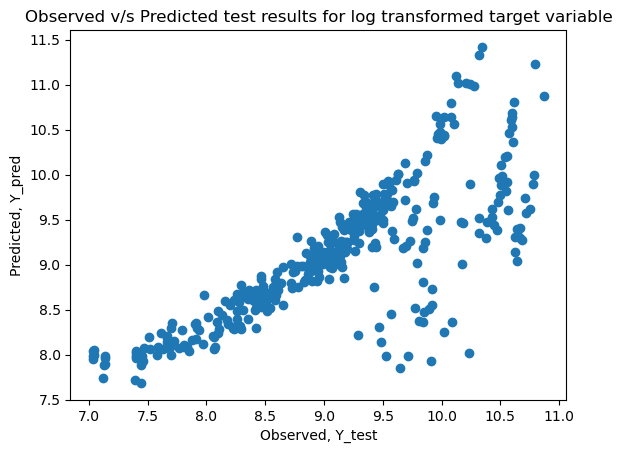

In [266]:
# Scatter plot between the ground truth and predicted value to make a better judgement
plt.scatter(Y_test, Y_pred)
plt.xlabel('Observed, Y_test')
plt.ylabel('Predicted, Y_pred')
plt.title('Observed v/s Predicted test results for log transformed target variable')
plt.show()

Our overall R_squared has improved and the scatter plot also looks better.

However, the model fails again at some of the extreme values.

# Result

In [265]:
# Create a dataframe comparing coeff. of both models
pd.DataFrame({'Attributes/Features': X_train.columns, 'Coeff._claim': lr.coef_, 'Coeff._log_claim': lr_log.coef_})

,Attributes/Features,Coeff._claim,Coeff._log_claim
0,age,275.254,0.037
1,bmi,370.352,0.018
2,children,564.398,0.117
3,bloodpressure,40.795,0.002
4,sex_male,468.320,-0.052
5,smoker_1,20138.208,1.501
6,region_northwest,-406.254,-0.082
7,region_southeast,-1431.230,-0.188
8,region_southwest,-1569.044,-0.183
9,diabetes_1,2678.023,0.165


In [268]:
pd.DataFrame({'Approach': ['Original dependent variable', 'Log transformed dependent variable'],
             'R_squared on test': [r_2_test, r_sq_test2],
             'R_squared on train': [r_2_train, r_sq_train2],
             'adjusted R_squared on test': [adj_r2_test, adj_r_sq_test2],
             'adjusted R_squared on train': [adj_r2_train, adj_r_sq_train2]})

,Approach,R_squared on test,R_squared on train,adjusted R_squared on test,adjusted R_squared on train
0,Original dependent variable,0.497,0.490,0.481,0.484
1,Log transformed dependent variable,0.620,0.650,0.608,0.646


We used linear regression to examine the effect of all the 9 regressors on the target variable 'claim'.The model could explain  only 49% variation in claim, as indicated by the R squared value of 0.497. However, after adjusting the number of predictors, the adjusted R squared value was 0.481.
We got better result of R squared (0.62) and adjusted R squared value (0.608) when tried to explain variance in log transformed target variable.

# Conclusion

Based on the results, the linear regression model gave us better results when the dependent variable was less skewed.

The model performed poorly when the values went extreme, possibly because the model has not seen enough data with extreme values.

We can have better predictions if we could have more data.

Glad to acquire new skills:)